# Project Name : Employee Evaluation for Promotion using ML and Eval Auto ML

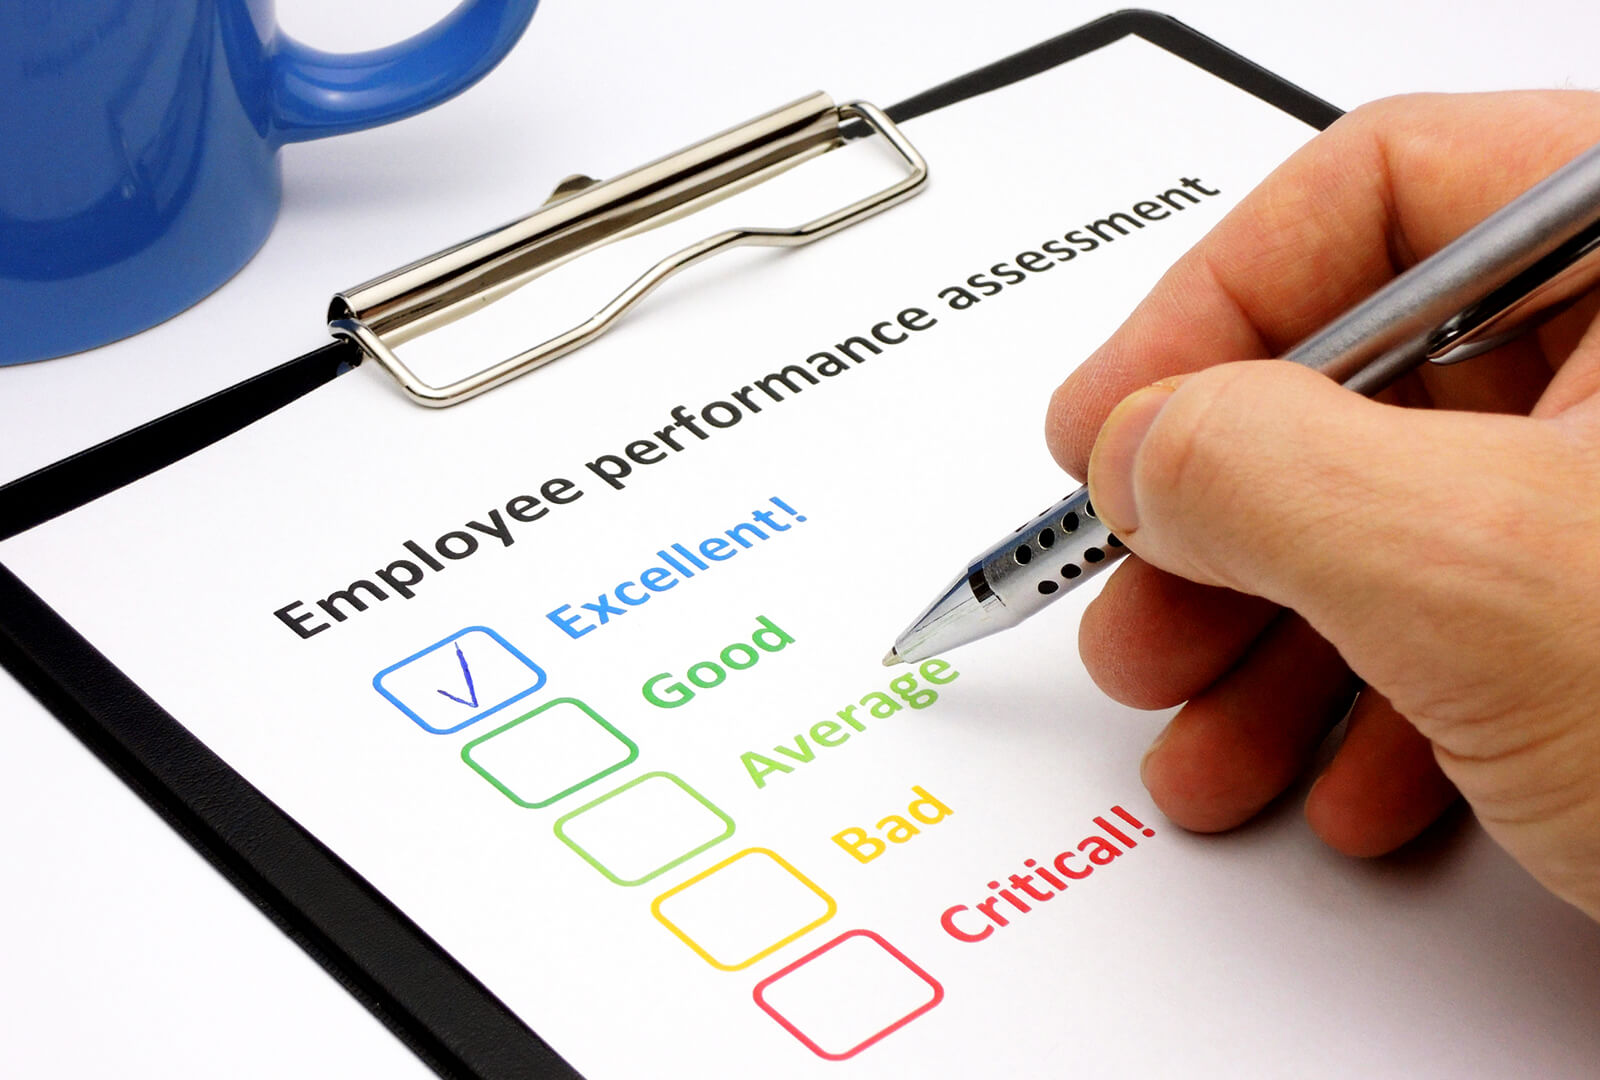

## Context:

### The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### We will build a model from stored data, that will predict if a person is eligible for promotion or not.

### Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis
- Feature Engineering
- Model building using ML models
- Model building and prediction using Auto ML

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/employee_promotion.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Data Analysis and Preprocessing

#### Null Values

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.drop(columns=['employee_id'], inplace=True)
df.head()

### Deviding features

In [ ]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']
num_features

In [ ]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
df[cat_features].nunique()

In [ ]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(df.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

In [ ]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [ ]:
for feature in columns:
    plot_curve(df,feature)

### We need to do log transformation

In [ ]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

In [ ]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
for feature in log_columns:
    plot_curve(df,feature)

#### Heat Map

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

### One Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

### Scaling our Data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

### Spllitting the data

In [ ]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

## Model Development:

### We will use the following models in this project:
- Decison Tree Classifier
- Random Forest Classifer 
- Logistci Regression

### Let us define a function which will give the different accuracy matrics

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

In [ ]:
plot_precision_recall_curve(dt_clf, X_test, y_test)

## Logistic Regression

In [ ]:
lr_clf = LogisticRegression()

In [ ]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

In [ ]:
plot_precision_recall_curve(lr_clf, X_test, y_test)

## Random Forest

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

In [ ]:
plot_precision_recall_curve(rf_clf, X_test, y_test)

## Using Auto ML

# EVAL ML : 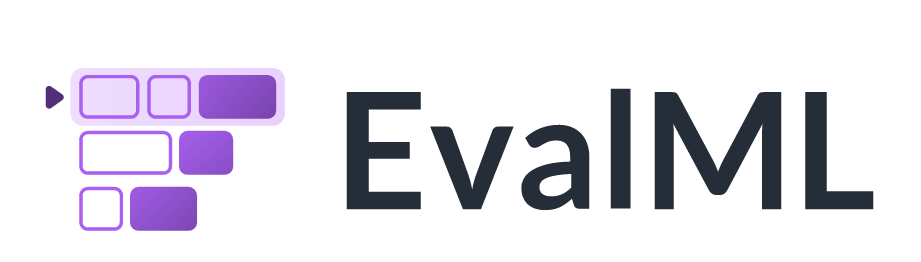

### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

### Installing Eval ML

In [ ]:
!pip install evalml

In [ ]:
!pip install scikit-learn==0.24

### We will use the same train and test dataset for this

In [ ]:
import evalml

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

In [ ]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

In [ ]:
automl.rankings

In [ ]:
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

### Predicting the results

In [ ]:
evalml.objectives.get_all_objective_names()

In [ ]:
best_pipeline.score(X_test, y_test,objectives=["accuracy binary"])

### We can save and load our model in pickle file also

In [ ]:
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')

In [ ]:
pred=final_model.predict(X_test)

In [ ]:
pred

In [ ]:
y_test